In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

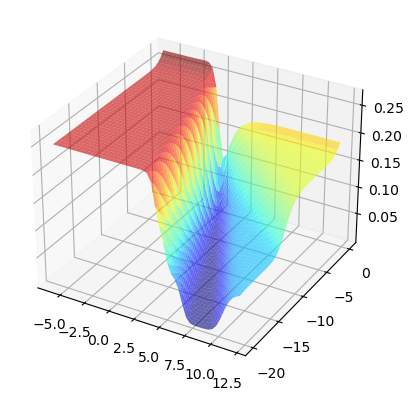

In [25]:
# x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])

x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

m = x_train.size

def z(w, b, x):
    return w * x + b

def f(w, b, x):
    z_value = z(w, b, x)
    return 1 / (1 + np.exp(-z_value))

def j_sample(w, b, x, y):
    return (f(w, b, x) - y) ** 2

def getCost(w, b, x: np.ndarray, y: np.ndarray):
    sum = 0
    for i in range(m):
        sum = sum + j_sample(w, b, x_train[i], y_train[i])

    return sum / (2 * m)


# The code below is taken from the helper methods which accompany Optional Labs.
# IDK what am I doing wrong, but my own implementation doesn't look like the one from the lectures
# Actually this one also looks different, which is weird

# w_samples = np.arange(-2, 2, 0.05)
# b_samples = np.arange(-2, 2, 0.05)

w_samples, b_samples = np.meshgrid(np.linspace(-6,12,50), np.linspace(0, -20, 40))
# w_samples = w_samples.ravel()
# b_samples = b_samples.ravel()


# costs = np.empty(w_samples.size * b_samples.size)
points = np.c_[w_samples.ravel(), b_samples.ravel()]
costs = np.zeros(points.shape[0])
idx = 0

for i in range(points.shape[0]):
    w,b = points[i]
    costs[i] = getCost(w, b, x_train, y_train)

costs = costs.reshape(w_samples.shape)

fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(w_samples, b_samples, costs, alpha=0.6,cmap=cm.jet,)